In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pyreadstat
import scipy.cluster.hierarchy as sch
import seaborn as sn

In [2]:
df, meta = pyreadstat.read_sav("cleaned_survey.sav")
df.head()

,性別,年級,教育,補習,英檢,父教,母教,收入,自1,自2,...,能力4,能力5,社經地位,自律學習,時間規劃,內在動機,外在動機,自信心,英語自評能力,內在動機平均X外在動機平均
0,1.0,3.0,2.0,2.0,3.0,5.0,5.0,3.0,4.0,4.0,...,3.0,3.0,5.0,4.0,4.0,3.0,3.00,3.0,3.0,9.0
1,1.0,2.0,3.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,...,4.0,4.0,4.0,3.0,3.0,3.2,3.75,3.6,3.6,12.0
2,0.0,3.0,2.0,1.0,3.0,5.0,5.0,4.0,2.0,2.0,...,2.0,2.0,5.0,2.4,4.0,2.4,4.00,2.4,2.2,9.6
3,0.0,3.0,1.0,1.0,1.0,3.0,4.0,3.0,2.0,2.0,...,2.0,2.0,3.5,2.6,3.5,2.4,3.00,2.0,2.4,7.2
4,1.0,3.0,2.0,2.0,3.0,5.0,5.0,4.0,3.0,2.0,...,2.0,3.0,5.0,2.6,4.0,2.4,4.00,3.6,2.8,9.6


In [3]:
#不放控制變數 加入應變數
x1 = df.loc[:,["教育","社經地位","自律學習","時間規劃","內在動機","外在動機","自信心","英語自評能力"]]
# x1

In [4]:
#不放應變數 
# x3 = df.loc[:,["性別","年級","英檢","教育","社經地位","自律學習","時間規劃","內在動機","外在動機","自信心"]]
x3 = df.loc[:,["教育","社經地位","自律學習","時間規劃","內在動機","外在動機","自信心"]]

In [5]:
dis1=sch.linkage(x1,metric='euclidean',method='ward')
dis3=sch.linkage(x3,metric='euclidean',method='ward')

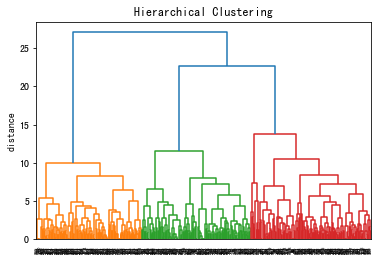

In [6]:
sch.dendrogram(dis1)
plt.title('Hierarchical Clustering')
plt.ylabel("distance")
plt.show()

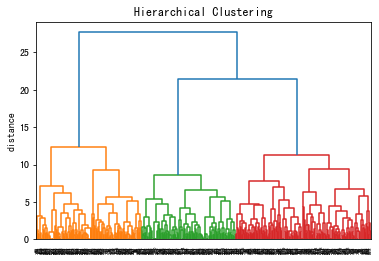

In [7]:
sch.dendrogram(dis3)
plt.title('Hierarchical Clustering')
plt.ylabel("distance")
plt.show()

In [8]:
kmeans1 = KMeans(n_clusters=3,init='k-means++', random_state=1).fit(x1)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [9]:
kmeans3 = KMeans(n_clusters=3,init='k-means++', random_state=1).fit(x3)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [10]:
# kmeans.cluster_centers_
preds1 = kmeans1.predict(x1)
len(preds1)

446

In [11]:
preds3 = kmeans3.predict(x3)
len(preds3)
# preds3

446

In [18]:
# preds1 #輸出0、1、2 代表群

In [13]:
#加入應變數
for i in range(3):
    print(np.mean(x1[preds1 ==i]),"\n人數",np.sum([preds1 ==i]),"\n")

教育        1.621302
社經地位      2.227811
自律學習      2.594083
時間規劃      3.013314
內在動機      2.668639
外在動機      3.245562
自信心       2.733728
英語自評能力    2.642604
dtype: float64 
人數 169 

教育        1.698718
社經地位      4.121795
自律學習      2.451282
時間規劃      2.875000
內在動機      2.278205
外在動機      3.206731
自信心       2.489744
英語自評能力    2.492308
dtype: float64 
人數 156 

教育        2.181818
社經地位      4.268595
自律學習      3.327273
時間規劃      3.390496
內在動機      3.370248
外在動機      3.634298
自信心       3.366942
英語自評能力    3.224793
dtype: float64 
人數 121 



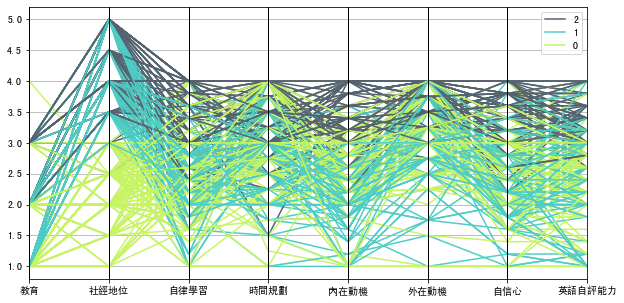

In [14]:
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Take the iris dataset
import seaborn as sns
#不加入控制變數
x1["group"] = preds1
# Make the plot
plt.figure(figsize=(10, 5))
parallel_coordinates(x1, "group", color=('#556270', '#4ECDC4', '#C7F464'))
plt.show()

In [15]:
#不加入應變數
for i in range(3):    
    print(np.mean(x3[preds3 ==i]),"\n人數",np.sum([preds3 ==i]),"\n加總再平均可排序",np.mean(np.mean(x3[preds3 ==i].iloc[:,2:])),"\n")

教育      1.629412
社經地位    2.232353
自律學習    2.583529
時間規劃    3.007353
內在動機    2.662353
外在動機    3.235294
自信心     2.729412
dtype: float64 
人數 170 
加總再平均可排序 2.843588235294117 

教育      1.686275
社經地位    4.143791
自律學習    2.445752
時間規劃    2.879085
內在動機    2.267974
外在動機    3.214052
自信心     2.486275
dtype: float64 
人數 153 
加總再平均可排序 2.6586274509803927 

教育      2.178862
社經地位    4.247967
自律學習    3.333333
時間規劃    3.384146
內在動機    3.370732
外在動機    3.632114
自信心     3.360976
dtype: float64 
人數 123 
加總再平均可排序 3.4162601626016267 



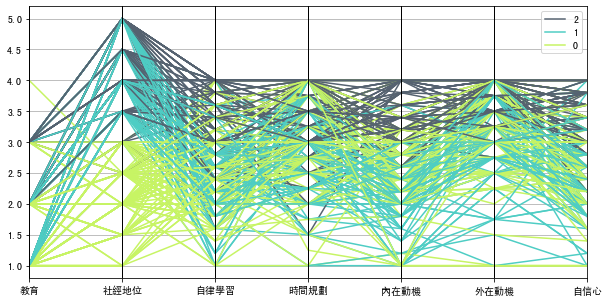

In [16]:
x3["group"] = preds3
# Make the plot
#未加入應變數、有加入控制變數
plt.figure(figsize=(10, 5))
parallel_coordinates(x3, "group", color=('#556270', '#4ECDC4', '#C7F464','#FF0000'))
plt.show()

In [17]:
# sn.heatmap(x1)
x1.head()

,教育,社經地位,自律學習,時間規劃,內在動機,外在動機,自信心,英語自評能力,group
0,2.0,5.0,4.0,4.0,3.0,3.00,3.0,3.0,2
1,3.0,4.0,3.0,3.0,3.2,3.75,3.6,3.6,2
2,2.0,5.0,2.4,4.0,2.4,4.00,2.4,2.2,1
3,1.0,3.5,2.6,3.5,2.4,3.00,2.0,2.4,1
4,2.0,5.0,2.6,4.0,2.4,4.00,3.6,2.8,2
...,...,...,...,...,...,...,...,...,...
441,2.0,4.0,3.6,3.0,2.0,3.75,2.6,1.0,1
442,1.0,4.0,3.4,1.5,1.8,2.75,2.4,2.4,1
443,1.0,1.0,2.4,4.0,1.0,1.00,1.0,2.2,0
444,1.0,3.5,2.0,2.0,2.6,3.00,3.4,3.2,1
